In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

In [112]:
dataset_path = '/content/gdrive/MyDrive/raisin/Raisin_Dataset/Raisin_Dataset.xlsx'
data = pd.read_excel(dataset_path)

## DISPLAYING THE ATTRIBUTES AND CHECKING NULL VALUES

In [113]:
print(data.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  


In [114]:
print(data.tail())

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class  
895  0.668793   1129.072  Besni  
896  0.636476   1214.252  Besni  
897  0.741099   1292.828  Besni  
898  0.658798   1258.548  Besni  
899  0.632020   1272.862  Besni  


In [115]:
missing_values = data.isnull().sum()
print(missing_values)

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


#   **LINEAR REGRESSION MODEL**

In [190]:
dataset_path = '/content/gdrive/MyDrive/raisin/Raisin_Dataset/Raisin_Dataset.xlsx'
data = pd.read_excel(dataset_path)
X = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']]
y = data['Class']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)


In [173]:
accuracy = accuracy_score(y_test, y_pred_lr.round())
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8666666666666667


## **KNN MODEL**

In [122]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score

In [123]:
dataset_path = '/content/gdrive/MyDrive/raisin/Raisin_Dataset/Raisin_Dataset.xlsx'
data = pd.read_excel(dataset_path)

X = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']]
y = data['Class']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
error_rates = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(np.mean(y_pred != y_test))


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error_rates, marker='o', markerfacecolor='green', linestyle='dashed', color='red', markersize=15)
plt.title("Error Rate vs. K Value", fontsize=20)
plt.xlabel("K-Value", fontsize=20)
plt.ylabel("Error Rate", fontsize=20)
plt.xticks(range(1, 31))
plt.show()


In [130]:
optimal_k = error_rates.index(min(error_rates)) + 1
print(f"The optimal value of K is: {optimal_k}")
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


The optimal value of K is: 16


In [131]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.86
Confusion Matrix:
[[71 15]
 [10 84]]

Classification Report:
              precision    recall  f1-score   support

       Besni       0.88      0.83      0.85        86
     Kecimen       0.85      0.89      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [132]:
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

In [133]:
print("KNN - Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(precision_knn, recall_knn, f1_knn))

KNN - Precision: 0.862, Recall: 0.861, F1 Score: 0.861


In [134]:
y_score = knn.predict_proba(X_test)[:, 1]
y_test_binary = label_binarize(y_test, classes=['Kecimen', 'Besni'])
fpr, tpr, _ = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)


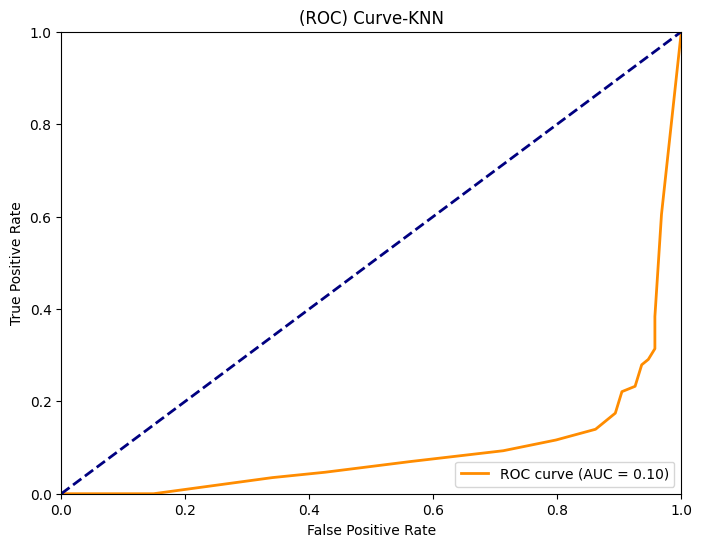

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve-KNN')
plt.legend(loc="lower right")
plt.show()

# **NAIVE BAYES MODEL**

In [136]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score


In [137]:
dataset_path = '/content/gdrive/MyDrive/raisin/Raisin_Dataset/Raisin_Dataset.xlsx'
data = pd.read_excel(dataset_path)

X = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']]
y = data['Class']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


In [141]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Model Accuracy:", accuracy)

Naive Bayes Model Accuracy: 0.8277777777777777


In [142]:
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

In [143]:
print("Naive Bayes - Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(precision_nb, recall_nb, f1_nb))

Naive Bayes - Precision: 0.836, Recall: 0.828, F1 Score: 0.826


In [144]:
y_score = nb.predict_proba(X_test)[:, 1]
y_test_binary = label_binarize(y_test, classes=['Kecimen', 'Besni'])
fpr, tpr, _ = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

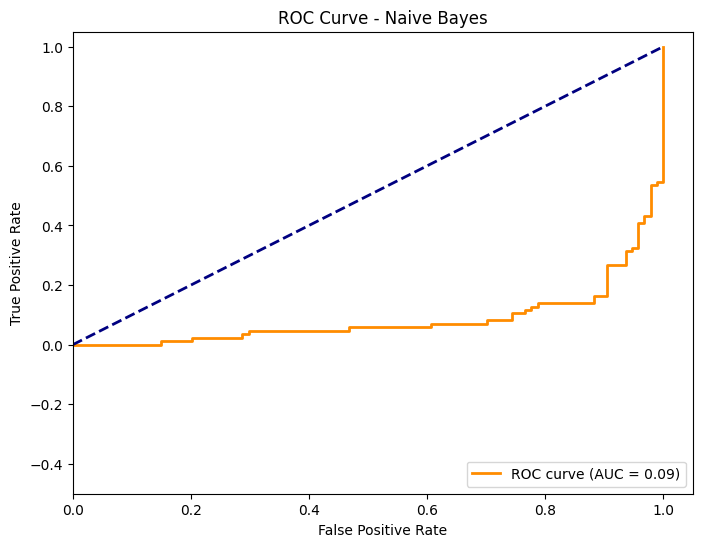

In [145]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([-0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# **PERCEPTRON LAYER ALGORITHM MODEL**

In [146]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [52]:
dataset_path = '/content/gdrive/MyDrive/raisin/Raisin_Dataset/Raisin_Dataset.xlsx'
data = pd.read_excel(dataset_path)

X = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']]
y = data['Class']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pla = Perceptron()
pla.fit(X_train, y_train)
y_pred_pla = pla.predict(X_test)


In [148]:
accuracy = accuracy_score(y_test, y_pred_pla)
print("PLA Model Accuracy:", accuracy)


PLA Model Accuracy: 0.4777777777777778


In [ ]:
precision_pla = precision_score(y_test, y_pred_pla, average='weighted')
recall_pla = recall_score(y_test, y_pred_pla, average='weighted')
f1_pla = f1_score(y_test, y_pred_pla, average='weighted')

In [151]:
print("Perceptron - Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(precision_pla, recall_pla, f1_pla))


Perceptron - Precision: 0.228, Recall: 0.478, F1 Score: 0.309


In [175]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

decision_train = pla.decision_function(X_train)
decision_test = pla.decision_function(X_test)
fpr_train, tpr_train, _ = roc_curve(y_train, decision_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, decision_test)
roc_auc_test = auc(fpr_test, tpr_test)


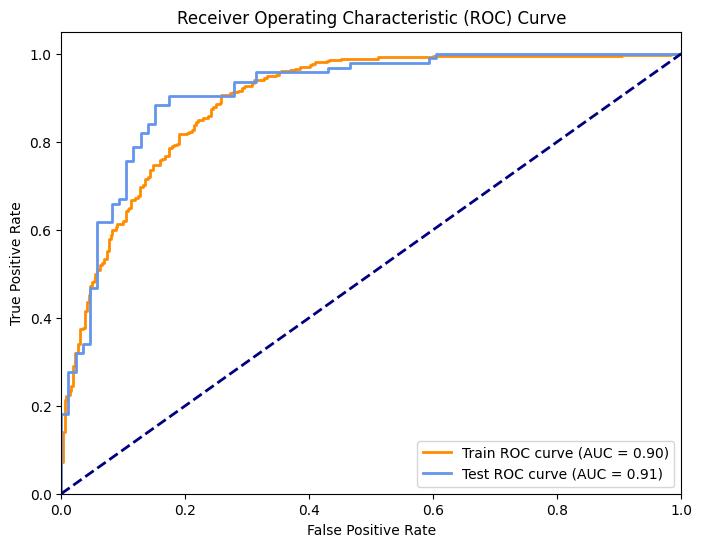

In [176]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **SUPPORT VECTOR MACHINE**

In [152]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [153]:
dataset_path = '/content/gdrive/MyDrive/raisin/Raisin_Dataset/Raisin_Dataset.xlsx'
data = pd.read_excel(dataset_path)

X = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']]
y = data['Class']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Model Accuracy:", accuracy)

SVM Model Accuracy: 0.85


In [159]:

precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

In [160]:
print("SVM - Precision: {:.3f}, Recall: {:.3f}, F1 Score: {:.3f}".format(precision_svm, recall_svm, f1_svm))

SVM - Precision: 0.853, Recall: 0.850, F1 Score: 0.850


In [179]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

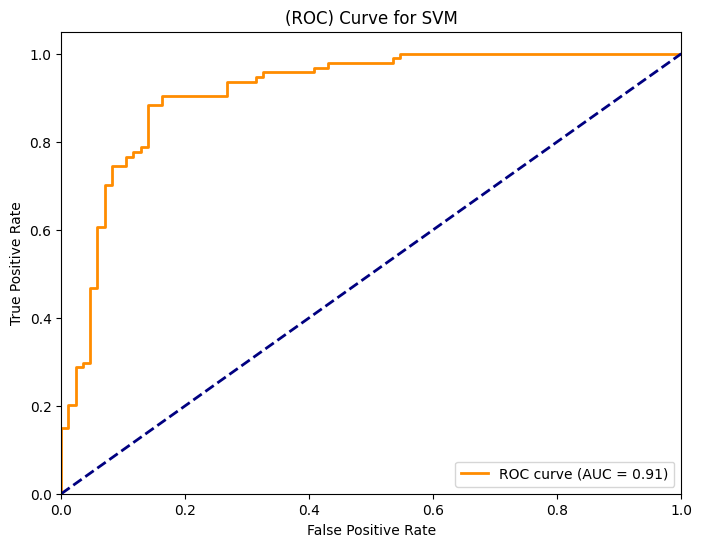

In [181]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()

# **MULTI LAYER PERCEPTRON MODEL**

In [161]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [162]:
dataset_path = '/content/gdrive/MyDrive/raisin/Raisin_Dataset/Raisin_Dataset.xlsx'
data = pd.read_excel(dataset_path)

X = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent']]
y = data['Class']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [194]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(7,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [195]:
y = pd.get_dummies(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [196]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(7,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [197]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
23/23 [==============================] - 1s 15ms/step - loss: 0.5157 - accuracy: 0.7403 - val_loss: 0.3990 - val_accuracy: 0.8500
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3840 - accuracy: 0.8556 - val_loss: 0.3504 - val_accuracy: 0.8611
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.8708 - val_loss: 0.3393 - val_accuracy: 0.8722
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3509 - accuracy: 0.8736 - val_loss: 0.3343 - val_accuracy: 0.8722
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3441 - accuracy: 0.8736 - val_loss: 0.3333 - val_accuracy: 0.8667
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3396 - accuracy: 0.8778 - val_loss: 0.3308 - val_accuracy: 0.8667
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3370 - accuracy: 0.8764 - val_loss: 0.3300 - val_accuracy: 0.8667
Epoch 8/100


In [199]:
y_pred_mlp = model.predict(X_test)
y_pred_class = np.argmax(y_pred_mlp, axis=1)
accuracy = accuracy_score(y_test.values.argmax(axis=1), y_pred_class)
print("MLP Model Accuracy:", accuracy)


6/6 [==============================] - 0s 4ms/step
MLP Model Accuracy: 0.8611111111111112


In [ ]:
y_score = model.predict_proba(X_test)[:, 1]
from sklearn.preprocessing import label_binarize
y_test_binary = label_binarize(y_test, classes=['Kecimen', 'Besni'])
fpr, tpr, _ = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.show()

# **CONCLUSION**
  - MULTI LAYER PERCEPTRON model and LINEAR Regression model has highest acuuracy of 0.86
  - So for the given model of raisin classification, MLP and LR is appropriate algorithm.

